In [3]:
import numpy as np
import pandas as pd

data = {
    'Customer ID': [1,2,3,4,5,6,7,8,9,10],
    'Age': [25,34,22,45,33,26,55,40,29,50],
    'Annual Income': [40000,55000,32000,75000,52000,41000,88000,69000,47000,90000],
    'Spending Score': [65,45,80,35,55,75,25,40,60,30]
}

df = pd.DataFrame(data)
print(df)


   Customer ID  Age  Annual Income  Spending Score
0            1   25          40000              65
1            2   34          55000              45
2            3   22          32000              80
3            4   45          75000              35
4            5   33          52000              55
5            6   26          41000              75
6            7   55          88000              25
7            8   40          69000              40
8            9   29          47000              60
9           10   50          90000              30


In [10]:
print(df.shape)

(10, 4)


In [14]:
df.isnull().sum()

Customer ID       0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

In [24]:
df.duplicated().sum()

0

In [36]:
df.dtypes

Customer ID       int64
Age               int64
Annual Income     int64
Spending Score    int64
dtype: object

In [32]:
df.describe()

,Customer ID,Age,Annual Income,Spending Score
count,10.00000,10.000000,10.000000,10.000000
mean,5.50000,35.900000,58900.000000,51.000000
std,3.02765,11.219527,20496.341137,18.973666
min,1.00000,22.000000,32000.000000,25.000000
25%,3.25000,26.750000,42500.000000,36.250000
50%,5.50000,33.500000,53500.000000,50.000000
75%,7.75000,43.750000,73500.000000,63.750000
max,10.00000,55.000000,90000.000000,80.000000


2. Data Preprocessing


In [4]:
from sklearn.preprocessing import StandardScaler
X = df[['Age', 'Annual Income', 'Spending Score']]

# StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a DataFrame to see standardized values
scaled_df = pd.DataFrame(X_scaled, columns=['Age', 'Annual Income', 'Spending Score'])
print(scaled_df)



        Age  Annual Income  Spending Score
0 -1.024073      -0.971995        0.777778
1 -0.178508      -0.200570       -0.333333
2 -1.305927      -1.383422        1.611111
3  0.854960       0.827996       -0.888889
4 -0.272460      -0.354855        0.222222
5 -0.930121      -0.920567        1.333333
6  1.794476       1.496564       -1.444444
7  0.385202       0.519426       -0.611111
8 -0.648266      -0.611997        0.500000
9  1.324718       1.599421       -1.166667


In [57]:
#MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

scaled_df = pd.DataFrame(X_scaled, columns=['Age', 'Annual Income', 'Spending Score'])
print(scaled_df)


        Age  Annual Income  Spending Score
0  0.090909       0.137931        0.727273
1  0.363636       0.396552        0.363636
2  0.000000       0.000000        1.000000
3  0.696970       0.741379        0.181818
4  0.333333       0.344828        0.545455
5  0.121212       0.155172        0.909091
6  1.000000       0.965517        0.000000
7  0.545455       0.637931        0.272727
8  0.212121       0.258621        0.636364
9  0.848485       1.000000        0.090909


3. Clustering

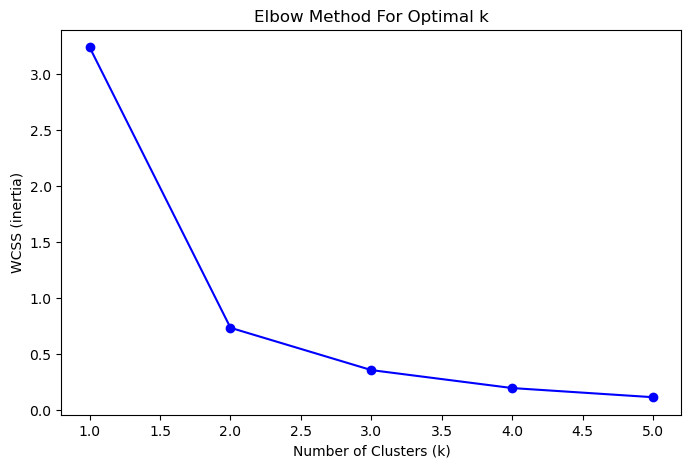

In [77]:
# 3. Elbow Method to find optimal k
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
K = range(1, 6)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (inertia)')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# Silhouette Scores
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
for k in range(2,6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score for k={k}: {score:.4f}")

Silhouette Score for k=2: 0.5915
Silhouette Score for k=3: 0.4436
Silhouette Score for k=4: 0.4551
Silhouette Score for k=5: 0.3658


In [ ]:
#K-Means Clustering 
from sklearn.cluster import KMeans
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print("\nCluster assignments:")
print(df[['Customer ID', 'Cluster']])


Cluster assignments:
   Customer ID  Cluster
0            1        1
1            2        2
2            3        1
3            4        0
4            5        2
5            6        1
6            7        0
7            8        2
8            9        1
9           10        0


4. Visualizations


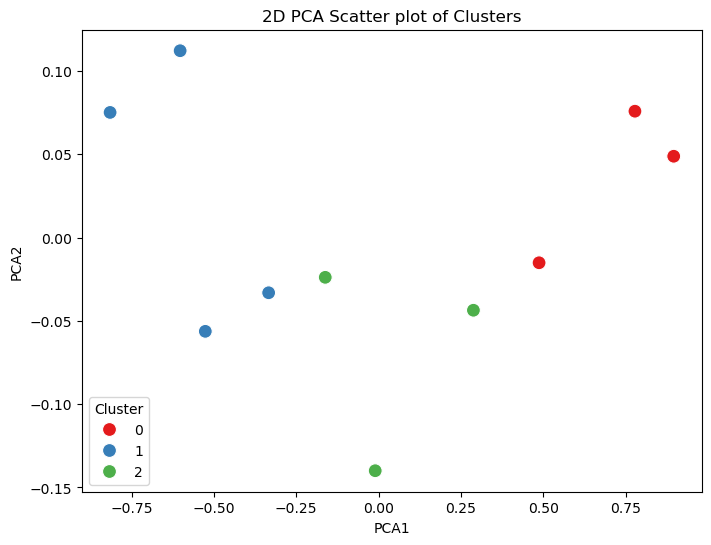

In [83]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------------
# 1. PCA scatter plot
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=100)
plt.title("2D PCA Scatter plot of Clusters")
plt.show()


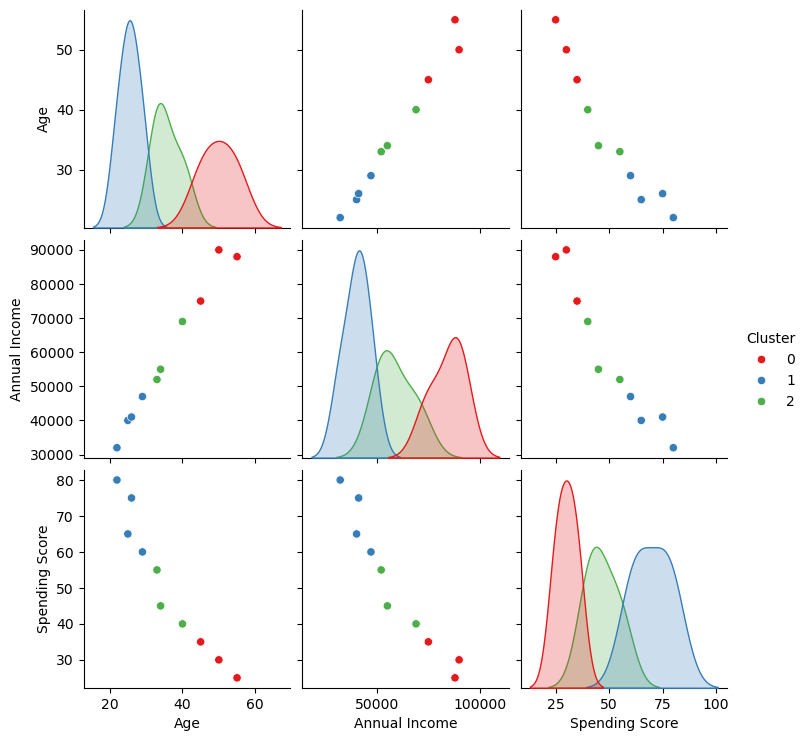

In [87]:
sns.pairplot(df[['Age', 'Annual Income', 'Spending Score', 'Cluster']], 
             hue='Cluster', palette='Set1', diag_kind='kde')
plt.show()


               Age  Annual Income  Spending Score
Cluster                                          
0        50.000000   84333.333333       30.000000
1        25.500000   40000.000000       70.000000
2        35.666667   58666.666667       46.666667


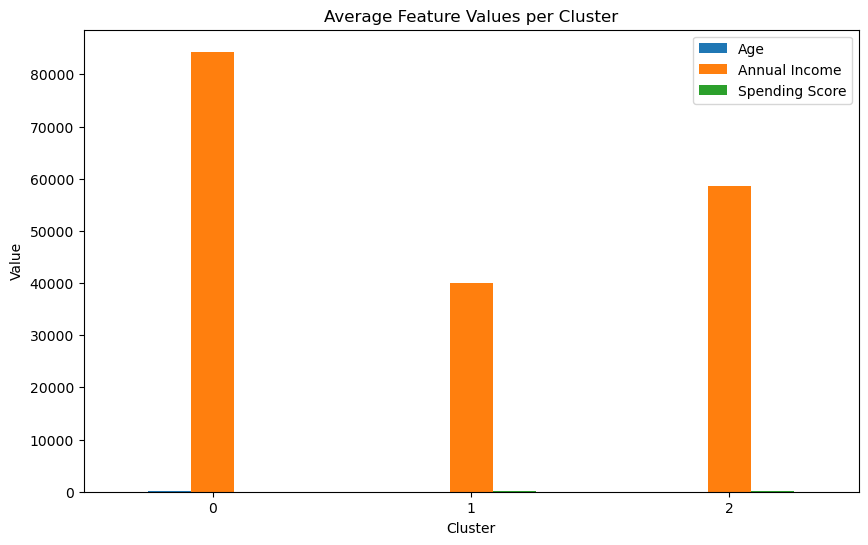

In [89]:
# Compute centroids (group means)
centroids = df.groupby('Cluster')[['Age', 'Annual Income', 'Spending Score']].mean()
print(centroids)

# Plot centroids as bar chart
centroids.plot(kind='bar', figsize=(10,6))
plt.title('Average Feature Values per Cluster')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.show()


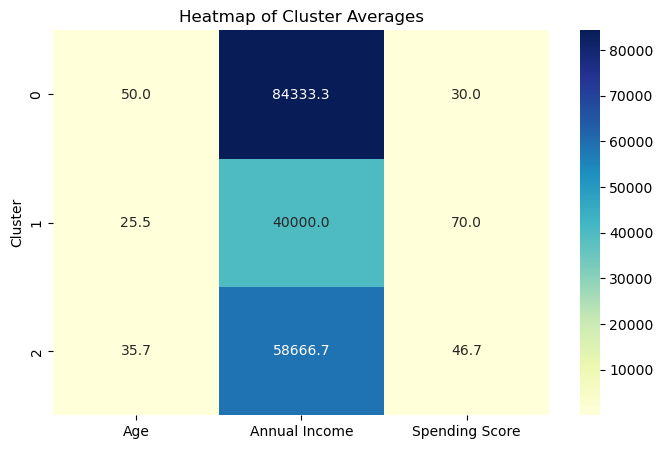

In [91]:
plt.figure(figsize=(8,5))
sns.heatmap(centroids, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title("Heatmap of Cluster Averages")
plt.show()


In [93]:
for i in range(optimal_k):
    segment = df[df['Cluster']==i]
    avg_income = segment['Annual Income'].mean()
    avg_spending = segment['Spending Score'].mean()
    print(f"\nCluster {i}:")
    print(f"- Average Income: {avg_income:.2f}")
    print(f"- Average Spending Score: {avg_spending:.2f}")
    if avg_spending > 60:
        print("→ Target with premium products & loyalty rewards.")
    elif avg_spending < 40:
        print("→ Encourage spending via promotions & offers.")
    else:
        print("→ Regular engagement & personalized recommendations.")


Cluster 0:
- Average Income: 84333.33
- Average Spending Score: 30.00
→ Encourage spending via promotions & offers.

Cluster 1:
- Average Income: 40000.00
- Average Spending Score: 70.00
→ Target with premium products & loyalty rewards.

Cluster 2:
- Average Income: 58666.67
- Average Spending Score: 46.67
→ Regular engagement & personalized recommendations.


In [97]:
# Compute cluster summary
summary = df.groupby('Cluster')[['Age', 'Annual Income', 'Spending Score']].mean()
print(summary)


               Age  Annual Income  Spending Score
Cluster                                          
0        50.000000   84333.333333       30.000000
1        25.500000   40000.000000       70.000000
2        35.666667   58666.666667       46.666667
